# Résolution d'équations différentielles pour la modélisation de dynamiques de population sur Python

En [écologie](https://fr.wikipedia.org/wiki/%C3%89cologie), une [population](https://fr.wikipedia.org/wiki/Population_(%C3%A9cologie)) est un groupe d'individus appartenant à une même espèce et vivant dans une même unité géorgaphique. On note $N(t)$ le nombre d'individus dans la population à l'instant $t$ (disons l'année $t$), et l'on s'intéresse à la forme de la fonction $ t \mapsto N(t) $ : cela nous permet de savoir comment la population va évoluer. Pour déterminer la forme de cette fonction, de nombreux modèles différents ont été développés, et la plupart font intervenir des [équations différentielles](https://fr.wikipedia.org/wiki/%C3%89quation_diff%C3%A9rentielle). Ce sont des équations qui relient entre elles une fonction et ses dérivées. 

Le but de ce projet est d'essayer de rédiger des algorithmes sur Python pour visualiser les solutions des équations différentielles impliquées dans ces modèles.

## A. Le modèle exponentiel

Le [modèle exponentiel](https://fr.wikipedia.org/wiki/Croissance_exponentielle) a été développé par Thomas Maltus au XVIIIe siècle. Il suppose que le taux de croissance d'une population est une constante donnée $c$. Cela vient de l'idée que la population possède un taux de natalité $b$ et un taux de mortalité $d$ indépendant de l'effectif de la population. On a $ c = b - d $. On a donc :

$$ \frac{N'(t)}{N(t)} = c $$

Donc, l'équation différentielle que nous cherchons à résoudre pour connaître l'évolution de la population est 

$$ N'(t) = c \times {N(t)} $$

C'est une équation différentielle linéaire du premier ordre à coefficient constant. 

 ### Cas 1 : On connait le taux de croissance $c$ et l'effectif de la population au temps $0$
 
 On suppose que l'on connait :
 - L'effectif de la population au temps $t=0$. Par exemple, supposons qu'il y a 10 individus. 
 - Le taux de croissance $c$. Par exemple, supposons que c = 10%. 
 
 
 Donc, nous cherchons la solution au problème suivant : 
 
 $$ (1) : \left\{ \begin{array}{ll}
        N'(t) = 0.1 \times N(t) \\
        N(0) = 10
        \end{array} \right.$$

C'est un problème que l'on sait résoudre analytiquement. Cependant, on peut aussi le résoudre numériquement et afficher la forme de sa solution grâce la [méthode d'Euler explicite](https://fr.wikipedia.org/wiki/M%C3%A9thode_d%27Euler).

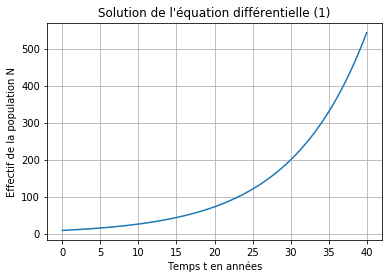

In [8]:
##### Résolution de l'équation (1) entre t = 0 et t = 40

import matplotlib.pyplot as plt
import numpy as np

# On définit F telle que F(N(t), t) = N'(t)
def F(N, t):
    """Fonction de l'équation (1)"""
    return 0.1 * N

n = 4000             # Le nombre de points pour lesquels on calcule l'image par N
dt =  0.01           # La taille de l'intervalle entre deux points
t_0, N_0 = 0, 10     # Les conditions initiales

# On choisit les valeurs de t pour lesquelles on calcule N
t = np.array([t_0 + k * dt for k in range(n)])

# On calcule N pour ces valeurs de t
N_list = [N_0]
for i in range(1, n):
    N_list.append(N_list[-1] + dt * F(N_list[-1], t[i-1]))
N = np.array(N_list)

# Représentation graphique de la solution
plt.plot(t, N)
plt.title("Solution de l'équation différentielle (1)")
plt.xlabel("Temps t en années")
plt.ylabel ("Effectif de la population N")
plt.grid()
plt.show()

Ce graphique nous permet de savoir que la population va croître de plus en plus rapidement. On peut lire qu'au bout d'environ 23 ans, il y aura plus d'une centaine d'individus. Au bout de 40 ans, il y aura plus de 500 individus.

Nous pouvons modifier le paramètre $n$ pour avoir une prévision à plus ou moins long terme. En fait, le paramètre $ n \times dt $ nous donne le nombre d'années que nous verrons sur le graphique. Par exemple, si l'on veut une prédiction pour le siècle à venir, on fixe $n = 10000$ et ainsi on a $ n \times dt = 100$. 

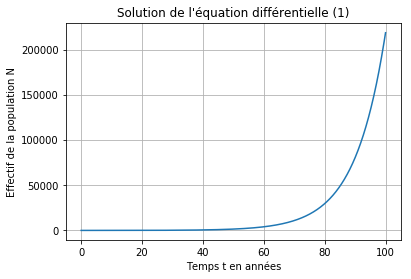

In [10]:
##### Résolution de l'équation (1) entre t = 0 et t = 100

import matplotlib.pyplot as plt
import numpy as np

# On définit F telle que F(N(t), t) = N'(t)
def F(N, t):
    """Fonction de l'équation (1)"""
    return 0.1 * N

n = 10000              # Le nombre de points pour lesquels on calcule l'image par N
dt =  0.01             # La taille de l'intervalle entre deux points
t_0, N_0 = 0, 10       # Les conditions initiales

# On choisit les valeurs de t pour lesquelles on calcule N
t = np.array([t_0 + k * dt for k in range(n)])

# On calcule N pour ces valeurs de t
N_list = [N_0]
for i in range(1, n):
    N_list.append(N_list[-1] + dt * F(N_list[-1], t[i-1]))
N = np.array(N_list)

# Représentation graphique de la solution
plt.plot(t, N)
plt.title("Solution de l'équation différentielle (1)")
plt.xlabel("Temps t en années")
plt.ylabel ("Effectif de la population N")
plt.grid()
plt.show()

On a une croissance explosive : au bout d'un siècle, notre population sera composée de plus de 200 000 individus ! Ce n'est pas un modèle très réaliste, nous ajouterons des hypothèses de régulation de la population au paragraphe B. Avant cela, étudions encore un peu le modèle exponentiel en supposant qu'on ne connait pas l'effectif initial de la population.

### Cas 2 : On connait le taux de croissance $c$ mais pas l'effectif initial
 
On suppose que l'on connait le taux de croissance $c$. Par exemple, supposons que c = 10%, c'est-à-dire que chaque année, la population augmente de 10%. Cependant, imaginons que le nombre d'individus à l'instant $t = 0$ est inconnu. Cela peut être intéressant en biologie de la conservation, par exemple si l'on veut (ré)introduire une espèce dans un écosystème, et que l'on se demande combien d'individus il faut introduire à l'instant $0$ pour avoir $N$ individus à l'instant $t$. Il s'agit de résoudre l'équation : 
 
$$ (2) : N'(t) = 0.1 \times N(t) $$

Cette équation a une infinité de solutions. On peut représenter les solutions pour différentes conditions initiales grâce la méthode d'Euler explicite. Ici, on affiche les solutions pour une population initiale de $0, 1, ..., 10$ individus.

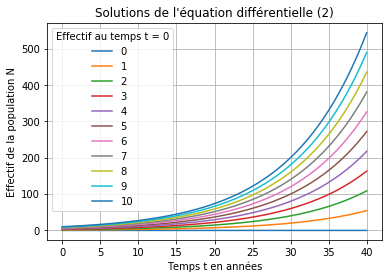

In [8]:
##### Résolution de l'équation (2) entre t = 0 et t = 40

import matplotlib.pyplot as plt
import numpy as np

# On définit F telle que F(N(t), t) = N'(t)
def F(N, t):
    """Fonction de l'équation (2)"""
    return 0.1 * N

n = 4000             # Le nombre de points pour lesquels on calcule l'image par N
dt =  0.01           # La taille de l'intervalle entre deux points
t_0 = 0              # La condition initiale


# On fait une boucle avec le nombre initial d'individus : ici on affiche les solutions pour N(0) = 0, .... , 10
for N_0 in range (11): 

    # On choisit les valeurs de t pour lesquelles on calcule N 
    t = np.array([t_0 + k * dt for k in range(n)])

    # On calcule N pour ces valeurs de t
    N_list = [N_0]
    for i in range(1, n):
        N_list.append(N_list[-1] + dt * F(N_list[-1], t[i-1]))
    N = np.array(N_list)

    # On trace la courbe de la solution
    name =  str(N_0) 
    plt.plot(t, N, label = name)

# On afficher la représentation graphique des solutions pour toutes les conditions initiales
plt.title("Solutions de l'équation différentielle (2)")
plt.xlabel("Temps t en années")
plt.ylabel ("Effectif de la population N")
plt.legend(title = 'Effectif au temps t = 0')
plt.grid()
plt.show()

On peut comparer les évolutions de la population sur les quarante premières années selon le nombre initial d'individus. Par exemple, au bout de 40 ans, 
- une population qui est initialement composée de 0 individu sera composée de 0 individu, 
- une population qui est initialement composée de 2 individus sera composée de 100 individus, 
- une population qui est initialement composée de 10 individus sera composée de plus de 500 individus.  

On peut utiliser la boucle `for` pour choisir les paramètres initiaux qui nous intéressent. Par exemple, pour avoir seulement les solutions quand les conditions initiales sont 0, 5, 10, 15 et 20 individus, on peut modifier le script ainsi.

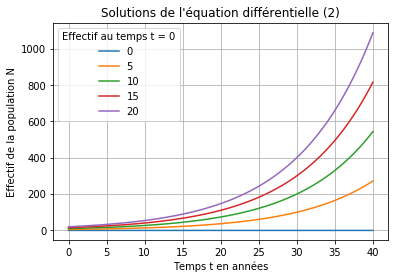

In [6]:
##### Résolution de l'équation (2) entre t = 0 et t = 40

import matplotlib.pyplot as plt
import numpy as np

# On définit F telle que F(N(t), t) = N'(t)
def F(N, t):
    """Fonction de l'équation (2)"""
    return 0.1 * N

n = 4000             # Le nombre de points pour lesquels on calcule l'image par N
dt =  0.01           # La taille de l'intervalle entre deux points
t_0 = 0              # La condition initiale


# On fait une boucle avec le nombre initial d'individus : ici on affiche les solutions pour N(0) = 0, 5, 10, 15, 20
for N_0 in range (0, 21, 5): 

    # On choisit les valeurs de t pour lesquelles on calcule N 
    t = np.array([t_0 + k * dt for k in range(n)])

    # On calcule N pour ces valeurs de t
    N_list = [N_0]
    for i in range(1, n):
        N_list.append(N_list[-1] + dt * F(N_list[-1], t[i-1]))
    N = np.array(N_list)

    # On trace la courbe de la solution
    name = str(N_0) 
    plt.plot(t, N, label = name)

# On afficher la représentation graphique des solutions pour toutes les conditions initiales
plt.title("Solutions de l'équation différentielle (2)")
plt.xlabel("Temps t en années")
plt.ylabel ("Effectif de la population N")
plt.legend(title = 'Effectif au temps t = 0')
plt.grid()
plt.show()

 ### Cas 3 : On connait l'effectif initial, mais pas le taux de croissance
 
On suppose que l'on ne connaît pas le taux de croissance $c$. Ce taux est positif si le taux de natalité est supérieur au taux de mortalité, ou négatif si le taux de mortalité est supérieur au taux de natalité. On suppose que l'on connaît l'effectif initial de la population : disons 10 individus. Il s'agit de résoudre l'équation suivante, pour différentes valeurs de $c$ : 
 
$$ (3) : \left\{ \begin{array}{ll}
        N'(t) = c \times N(t) \\
        N(0) = 10
        \end{array} \right.$$


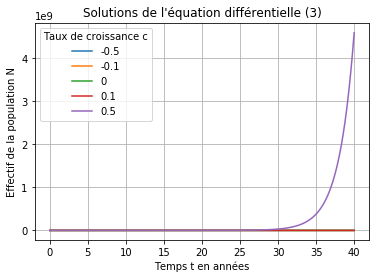

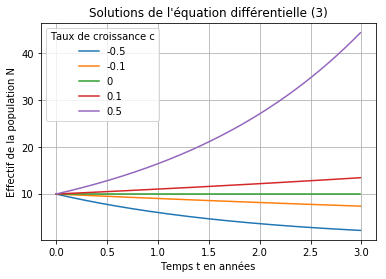

In [3]:
##### Résolution de l'équation (3) 

import matplotlib.pyplot as plt
import numpy as np



## On construit une première fois le graphique entre t = 0 et t = 40

# On choisit les valeurs de c pour lesquelles on veut tracer la courbe :  -0.5 ; -0.1 ; 0 ; 0.1 et 0.5
for c in [-0.5, -0.1, 0, 0.1, 0.5]:

    # On définit F telle que F(N(t), t) = N'(t)
    def F(N, t):
        """Fonction de l'équation (3)"""
        return c * N

    n = 4000             # Le nombre de points pour lesquels on calcule l'image par N
    dt =  0.01           # La taille de l'intervalle entre deux points
    t_0, N_0 = 0, 10     # Les conditions initiales

    # On choisit les valeurs de t pour lesquelles on calcule N 
    t = np.array([t_0 + k * dt for k in range(n)])

    # On calcule N pour ces valeurs de t
    N_list = [N_0]
    for i in range(1, n):
        N_list.append(N_list[-1] + dt * F(N_list[-1], t[i-1]))
    N = np.array(N_list)

    # On trace la courbe de la solution
    name = str(c) 
    plt.plot(t, N, label = name)

# On afficher la représentation graphique des solutions pour toutes les conditions initiales
plt.title("Solutions de l'équation différentielle (3)")
plt.xlabel("Temps t en années")
plt.ylabel ("Effectif de la population N")
plt.legend(title = 'Taux de croissance c')
plt.grid()
plt.show()



## On construit une seconde fois le graphique entre t = 0 et t = 3 

# On choisit les valeurs de c pour lesquelles on veut tracer la courbe : -0.5 ; -0.1 ; 0 ; 0.1 et 0.5
for c in [-0.5, -0.1, 0, 0.1, 0.5]:

    # On définit F telle que F(N(t), t) = N'(t)
    def F(N, t):
        """Fonction de l'équation (3)"""
        return c * N

    n = 300              # Le nombre de points pour lesquels on calcule l'image par N
    dt =  0.01           # La taille de l'intervalle entre deux points
    t_0, N_0 = 0, 10     # Les conditions initiales

    # On choisit les valeurs de t pour lesquelles on calcule N 
    t = np.array([t_0 + k * dt for k in range(n)])

    # On calcule N pour ces valeurs de t
    N_list = [N_0]
    for i in range(1, n):
        N_list.append(N_list[-1] + dt * F(N_list[-1], t[i-1]))
    N = np.array(N_list)

    # On trace la courbe de la solution
    name = str(c) 
    plt.plot(t, N, label = name)

# On afficher la représentation graphique des solutions pour toutes les conditions initiales
plt.title("Solutions de l'équation différentielle (3)")
plt.xlabel("Temps t en années")
plt.ylabel ("Effectif de la population N")
plt.legend(title = 'Taux de croissance c')
plt.grid()
plt.show()

On affiche les résultats avec deux échelles différentes. Sans surprise, les taux de croissance négatifs font tendre la population vers 0, le taux de croissance nul entraîne un maintien de la population à son effectif initial de 10 individus et les taux de croissance positifs font croître la population. Cependant, il est intéressant de comparer l'évolution de la population avec un taux de croissance de 10% et celle  de la population avec un taux de croissance de 50% : l'écart se creuse extrêmement vite. 

## B. Le modèle de croissance logistique 

Le modèle exponentiel est problématique, parce que pour un taux de croissance positif, il prévoit une explosion de la population - cela n'est jamais observé empiriquement, parce que les ressources sont limitées dans tout milieu : nourriture, espace, etc. Le [modèle de Verhulst](https://fr.wikipedia.org/wiki/Mod%C3%A8le_de_Verhulst) est proposé par le mathématicien Pierre François Verhulst au XIXe siècle pour prendre en compte la saturation due aux contraintes du milieu. Plus il y a d'individus dans la population, plus il est difficile d'accéder aux ressources, donc plus la compétition interspécifique (entre les individus de la population) est forte. 

Pour prendre en compte cette compétition interspécifique, on considère que la population a une croissance dite intrinsèque $r$ qui correspond au taux de croissance dans le modèle exponentiel. Mais on ajoute une hypothèse : la croissance de la population décroit avec la taille de la population de manière affine (avec un coefficient $c$). On a donc une équation de la forme :
$$ \frac{N'(t)}{N(t)} = r - cN(t)$$ 
avec $r$, $c \geq 0$. On peut l'écrire sous cette forme :
$$ N'(t) = rN(t)(1- \frac{c}{r}N(t)) $$


On définit $K = \frac{r}{c} $ la capacité d'accueil du milieu, c'est-à-dire le nombre maximum d'individus qu'une population peut contenir dans un écosystème de façon durable. On s'intéresse à l'équation différentielle suivante : 

$$ N'(t) = rN(t) (1 - \frac{N(t)}{K}) $$


Supposons que le taux de croissance est $r = 5%$ et que la capacité maximale d'accueil est $K = 80$ individus. Le programme suivant permet d'afficher les solutions de l'équation $(4)$ pour des populations dont les effectifs initiaux sont $10$, $20$ ... , $150$ individus sur l'intervalle $t = [0;100]$. On résout donc l'équation : 
$$ (4) : N'(t) = 0,05 \times N(t) (1 - \frac{N(t)}{80}) $$

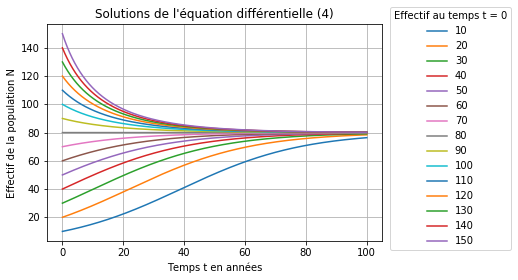

In [13]:
##### Résolution de l'équation (4) entre t = 0 et t = 100

import matplotlib.pyplot as plt
import numpy as np

# On définit F telle que F(N(t), t) = N'(t)
def F(N, t):
    """Fonction de l'équation (4)"""
    return (0.05 * N) * (1 - (N / 80))

n = 10000             # Le nombre de points pour lesquels on calcule l'image par N
dt =  0.01            # La taille de l'intervalle entre deux points
t_0 = 0               # La condition initiale


# On fait une boucle avec le nombre initial d'individus : ici on affiche les solutions pour N(0) = 10, 20, ... , 150
for N_0 in range (10, 160, 10): 

    # On choisit les valeurs de t pour lesquelles on calcule N 
    t = np.array([t_0 + k * dt for k in range(n)])

    # On calcule N pour ces valeurs de t
    N_list = [N_0]
    for i in range(1, n):
        N_list.append(N_list[-1] + dt * F(N_list[-1], t[i-1]))
    N = np.array(N_list)

    # On trace la courbe de la solution
    name =  str(N_0) 
    plt.plot(t, N, label = name)

# On affiche la représentation graphique des solutions pour toutes les conditions initiales
plt.title("Solutions de l'équation différentielle (4)")
plt.xlabel("Temps t en années")
plt.ylabel ("Effectif de la population N")
plt.legend(title = 'Effectif au temps t = 0', loc='upper right', bbox_to_anchor=(1.4, 1.1))
plt.grid()
plt.show()

On remarque que l'effectif de la population converge vers $K$ : c'est pourquoi on appelle cette valeur la capacité d'accueil. Quand l'effectif initial est supérieur à la capacité d'accueil, la population décroît. Quand il est inférieur à la capacité d'accueil, la population croît. 

## C. Le modèle de Lotka-Volterra

Le [modèle de Lokta-Volterra](https://fr.wikipedia.org/wiki/%C3%89quations_de_pr%C3%A9dation_de_Lotka-Volterra) permet de modéliser la dynamique de deux populations en interaction : une population de proies $N$ et une population de prédateurs $P$. 

On suppose que la population de proies a un taux de croissance intrinsèque $r$ indépendant des prédateurs, et un taux de mortalité dû à la rencontre avec des prédateurs qui est croissant de l'effectif de la population de prédateurs (coefficient $c$). On a donc : 
$$ \frac{N'(t)}{N(t)} = r - cP(t) $$

On suppose que la population de prédateurs a un taux de mortalité intrinsèque $m$ indépendant des proies, et un taux de croissance dû à la rencontre avec des proies qui est croissant de l'effectif de la population de proies (coefficient $b$). On a donc : 
$$ \frac{P'(t)}{P(t)} =  bN(t) - m $$

Donc, la situation peut être modélisée par le système suivant : 
$$ \left\{
    \begin{array}{ll}
        N'(t) = rN(t) - cN(t)P(t) \\
        P'(t) = bN(t)P(t) - mP(t)
    \end{array}
\right. $$

On propose de résoudre ce modèle avec les coefficients suivants : $r = 2$ ; $c = 1$ ; $b = 0.2$ et $m = 1$, soit 
$$ (5) \left\{
    \begin{array}{ll}
        N'(t) = 2N(t) - 1N(t)P(t) \\
        P'(t) = 0.2N(t)P(t) - 1P(t)
    \end{array}
\right. $$
et ce pour les effectifs initaux suivants : $N(0) = 6$ et $P(0) = 2$ 

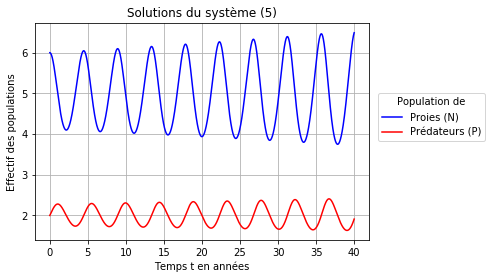

In [2]:
##### Résolution du système (5) entre t = 0 et t = 40

import matplotlib.pyplot as plt
import numpy as np

# On définit F telle que F(N(t), P(t), t) = (N'(t), P'(t))
def F(N, P, t):
    """Fonction de l'équation (5)"""
    return [(2 * N) - (1 * N * P),        # La première ligne du système
            (0.2 * N * P) - (1 * P)]      # La seconde ligne du système

n = 4000                                  # Le nombre de points pour lesquels on calcule l'image par N et P
dt =  0.01                                # La taille de l'intervalle entre deux points
t_0, N_0, P_0 = 0, 6, 2                   # La condition initiale

# On choisit les valeurs de t pour lesquelles on calcule N et P
t = np.array([t_0 + k * dt for k in range(n)])

# On calcule N et P pour ces valeurs de t
N_list = [N_0]
P_list = [P_0]

for i in range(1,n):
    N_list.append(N_list[-1] + dt * F(N_list[-1], P_list[-1], t[i-1])[0])
    P_list.append(P_list[-1] + dt * F(N_list[-2], P_list[-1], t[i-1])[1])
N = np.array(N_list)
P = np.array(P_list)

# On trace la courbe de la solution pour N
plt.plot(t, N, color="blue", label="Proies (N)")

# On trace la courbe de la solution pour P
plt.plot(t, P, color="red", label="Prédateurs (P)")

# On affiche la représentation graphique des solutions 
plt.title("Solutions du système (5)")
plt.xlabel("Temps t en années")
plt.ylabel ("Effectif des populations")
plt.legend(title = "Population de", loc='upper right', bbox_to_anchor=(1.36, 0.7))
plt.grid()
plt.show()

On remarque que l'on a une évolution cyclique. En effet, quand la population de proies augmente, la population de prédateurs augmente à la génération suivante, ce qui fait baisser le nombre de proies à la génération d'après et finalement, le nombre de prédateurs diminue - puis le cycle recommence. 

## Conclusion

Au cours de ce projet, j'ai commencé par rédiger un premier programme de résolution d'équations différentielles pour résoudre l'équation $(1)$ du modèle exponentiel. Quelques adaptations de ce programme initial m'ont permis de : 
- Afficher les solutions d'équations différentielles avec différentes conditions de départ
- Afficher les solutions d'équations différentielles en faisant varier des paramètres
- Changer la forme de l'équation pour résoudre le modèle de croissance logistique
- Résoudre un système d'équations différentielles (Lotka-Volterra)